In [3]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline   
import xlrd

In [5]:
!pip install wbgapi

In [6]:
import wbgapi as wb

In [7]:
# wb.series.info()
wb.series.info(q='Internet')

id,value
IT.NET.SECR,Secure Internet servers
IT.NET.SECR.P6,Secure Internet servers (per 1 million people)
IT.NET.USER.ZS,Individuals using the Internet (% of population)
,3 elements


In [8]:
wb.region.info()

code,name
AFE,Africa Eastern and Southern
AFR,Africa
AFW,Africa Western and Central
ARB,Arab World
CAA,Sub-Saharan Africa (IFC classification)
CEA,East Asia and the Pacific (IFC classification)
CEB,Central Europe and the Baltics
CEU,Europe and Central Asia (IFC classification)
CLA,Latin America and the Caribbean (IFC classification)
CME,Middle East and North Africa (IFC classification)


# 데이터 전처리

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
ant = wb.data.DataFrame('FX.OWN.TOTL.ZS',  wb.region.members('WLD'))
ant_k = ant.loc['KOR']
ant_k.isnull().sum()

58

In [11]:
ant_k = pd.DataFrame(ant_k, columns=['KOR'])
ant_k.reset_index(level=0, inplace=True)
ant_k.columns = ['year', 'ant_k']
ant_k['year'] = ant_k['year'].str.strip('YR')
ant_k

,year,ant_k
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
56,2016,NaN
57,2017,94.851013
58,2018,NaN
59,2019,NaN


In [12]:
gdp = wb.data.DataFrame('NY.GDP.PCAP.CD',  wb.region.members('WLD'))
gdp_k = gdp.loc['KOR']
gdp_k.isnull().sum()

0

In [13]:
gdp_k = pd.DataFrame(gdp_k, columns=['KOR'])
gdp_k.reset_index(level=0, inplace=True)
gdp_k.columns = ['year', 'gdp_k']
gdp_k['year'] = gdp_k['year'].str.strip('YR')
gdp_k

,year,gdp_k
0,1960,158.249303
1,1961,93.828649
2,1962,106.148506
3,1963,146.314342
4,1964,123.603495
...,...,...
56,2016,29288.870439
57,2017,31616.843400
58,2018,33422.944210
59,2019,31846.218232


In [14]:
atm = wb.data.DataFrame('FB.ATM.TOTL.P5',  wb.region.members('WLD'))
atm_k = atm.loc['KOR']
atm_k.isnull().sum()

45

In [15]:
atm_k = pd.DataFrame(atm_k, columns=['KOR'])
atm_k.reset_index(level=0, inplace=True)
atm_k.columns = ['year', 'atm_k']
atm_k['year'] = atm_k['year'].str.strip('YR')
atm_k

,year,atm_k
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
56,2016,271.561831
57,2017,272.592801
58,2018,266.967032
59,2019,264.621500


In [16]:
bank = wb.data.DataFrame('FB.CBK.BRCH.P5',  wb.region.members('WLD'))
bank_k = bank.loc['KOR']
bank_k.isnull().sum()

44

In [17]:
bank_k = pd.DataFrame(bank_k, columns=['KOR'])
bank_k.reset_index(level=0, inplace=True)
bank_k.columns = ['year', 'bank_k']
bank_k['year'] = bank_k['year'].str.strip('YR')
bank_k

,year,bank_k
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
56,2016,16.24
57,2017,15.44
58,2018,15.27
59,2019,15.10


In [18]:
old = wb.data.DataFrame('SP.POP.65UP.TO.ZS',  wb.region.members('WLD'))
old_k = old.loc['KOR']
old_k.isnull().sum()

0

In [19]:
old_k = pd.DataFrame(old_k, columns=['KOR'])
old_k.reset_index(level=0, inplace=True)
old_k.columns = ['year', 'old_k']
old_k['year'] = old_k['year'].str.strip('YR')
old_k

,year,old_k
0,1960,3.366464
1,1961,3.393214
2,1962,3.429453
3,1963,3.463467
4,1964,3.478335
...,...,...
56,2016,13.337940
57,2017,13.852248
58,2018,14.418556
59,2019,15.060177


In [20]:
it = wb.data.DataFrame('IT.NET.USER.ZS',  wb.region.members('WLD'))
it_k = it.loc['KOR']
it_k.isnull().sum()

30

In [21]:
it_k = pd.DataFrame(it_k, columns=['KOR'])
it_k.reset_index(level=0, inplace=True)
it_k.columns = ['year', 'it_k']
it_k['year'] = it_k['year'].str.strip('YR')
it_k

,year,it_k
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
56,2016,92.843026
57,2017,95.069422
58,2018,96.022860
59,2019,96.157579


In [22]:
data = pd.concat([ant_k, gdp_k, atm_k, bank_k, old_k, it_k], axis=1)
data = data.loc[:, ~data.T.duplicated()]
data.to_csv('step3_korea.csv')
data.tail(10)

,year,ant_k,gdp_k,atm_k,bank_k,old_k,it_k
51,2011,93.046867,25096.263884,281.231400,18.22,11.101334,83.759120
52,2012,NaN,25466.760517,288.445032,18.31,11.528646,84.070000
53,2013,NaN,27182.734310,288.585453,18.02,11.963298,84.770000
54,2014,94.360817,29249.575221,280.808058,17.20,12.402767,87.556826
55,2015,NaN,28732.231076,275.880822,16.75,12.859361,89.896256
56,2016,NaN,29288.870439,271.561831,16.24,13.337940,92.843026
57,2017,94.851013,31616.843400,272.592801,15.44,13.852248,95.069422
58,2018,NaN,33422.944210,266.967032,15.27,14.418556,96.022860
59,2019,NaN,31846.218232,264.621500,15.10,15.060177,96.157579
60,2020,NaN,31489.122697,NaN,14.37,15.790906,96.505060


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    61 non-null     object 
 1   ant_k   3 non-null      float64
 2   gdp_k   61 non-null     float64
 3   atm_k   16 non-null     float64
 4   bank_k  17 non-null     float64
 5   old_k   61 non-null     float64
 6   it_k    31 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.5+ KB


In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 시각화

In [25]:
sns.set_style('white')

1. 경제 요인 분석

In [26]:
# 대체 변수 1. Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)
# ant=wb.data.DataFrame('FX.OWN.TOTL.ZS',  wb.region.members('WLD'))
ant_all = ant.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK','KOR']]
ant_all = ant_all.dropna(how='all',axis=True)

ant_nocash=ant_all.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
ant_k=ant_all.loc['KOR']
us_ant=ant_all.loc[['SWE','GBR','NLD','USA','NOR','DNK']]

In [27]:
ant_compare = ant_all.loc[['THA', 'VNM', 'PHL', 'NLD', 'DNK', 'KOR'], :]
ant_low = ant_all.loc[['THA', 'VNM', 'PHL'], :]
ant_high = ant_all.loc[['NLD', 'DNK'], :]

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

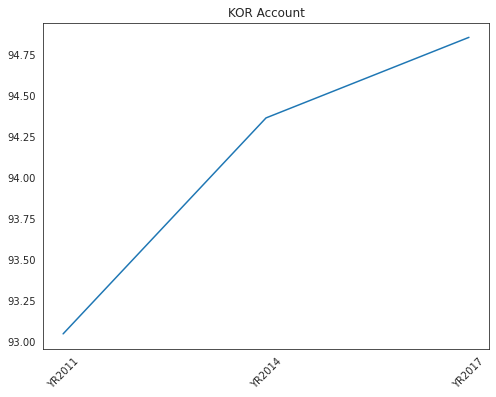

In [28]:
plt.figure(figsize = (8,6))

ant_k_df = pd.DataFrame(ant_k)

sns.lineplot(data=ant_k_df, legend=False)
plt.title('KOR Account')
plt.xticks(rotation=45)

<Figure size 1080x576 with 0 Axes>

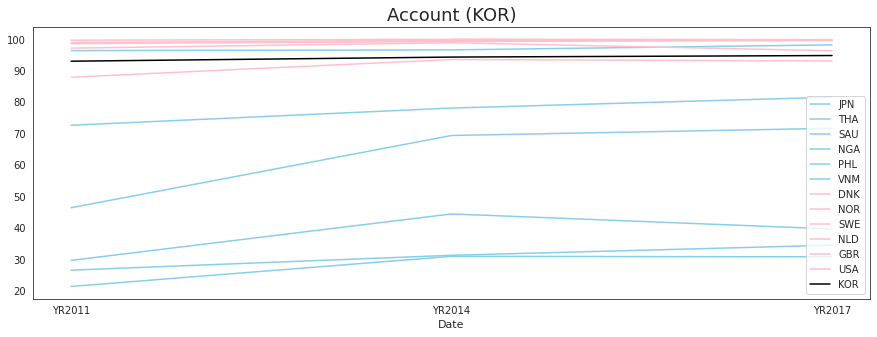

In [29]:
# a=ant_low.sort_values(by='YR2017', ascending=False)[:6]
# b=ant_high.sort_values(by='YR2017', ascending=False)[:6]
sns.set_style('white')

a=ant_nocash.sort_values(by='YR2017', ascending=False)[:6]
b=us_ant.sort_values(by='YR2017', ascending=False)[:6]
c=ant_k
plt.figure(figsize = (15,8))
# ax=all_ant.transpose().plot(color='lightgray', legend=False)
ax = a.T.plot(color='skyblue')
b.T.plot(ax=ax, color='pink', figsize=(15,5))
c.T.plot(ax=ax, color='black', figsize=(15,5))

plt.title('Account (KOR)', fontsize=18)
plt.xlabel('Date', fontsize=11)
plt.legend(loc='lower right')
plt.show()

In [30]:
# 대체 변수 2. Commercial bank branches (per 100,000 adults)
#  베트남, 필리핀, 태국 / dnk nld
# bank=wb.data.DataFrame('FB.CBK.BRCH.P5',  wb.region.members('WLD'))
bank_all = bank.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK','KOR']]
bank_all = bank_all.dropna(how='all',axis=True)

bank_nocash=bank_all.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
bank_k=bank_all.loc['KOR']
us_bank=bank_all.loc[['SWE','GBR','NLD','USA','NOR','DNK']]

In [31]:
bank_compare = bank_all.loc[['THA', 'VNM', 'PHL', 'NLD', 'DNK', 'KOR'], :]
bank_low = bank_all.loc[['THA', 'VNM', 'PHL'], :]
bank_high = bank_all.loc[['NLD', 'DNK'], :]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

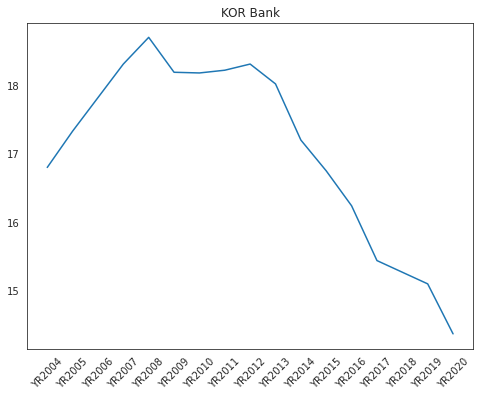

In [32]:
plt.figure(figsize = (8,6))

bank_k_df = pd.DataFrame(bank_k)

sns.lineplot(data=bank_k_df, legend=False)
plt.title('KOR Bank')
plt.xticks(rotation=45)

<Figure size 1080x576 with 0 Axes>

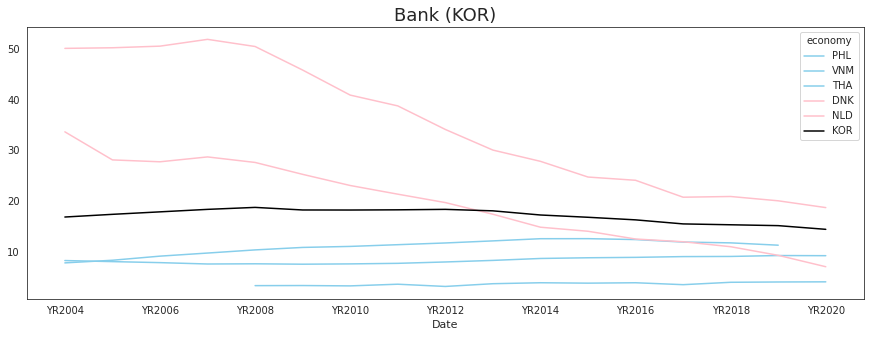

In [33]:
# Line graph by seaborn
# 대체 변수 2. Commercial bank branches (per 100,000 adults)

a=bank_low.sort_values(by='YR2020', ascending=False)[:6]
b=bank_high.sort_values(by='YR2020', ascending=False)[:6]
c=bank_k
plt.figure(figsize = (15,8))
#ax=all_bank.transpose().plot(color='white', legend=False)
ax = a.T.plot(color='skyblue')
b.T.plot(ax=ax, color='pink', figsize=(15,5))
c.T.plot(ax=ax, color='black', figsize=(15,5), legend=True)
plt.title('Bank (KOR)', fontsize=18)
plt.xlabel('Date', fontsize=11)

plt.show()

In [34]:
# 대체 변수 3. Automated teller machines (ATMs) (per 100,000 adults)
# atm=wb.data.DataFrame('FB.ATM.TOTL.P5',  wb.region.members('WLD'))
atm_all = atm.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK','KOR']]
atm_all = atm_all.dropna(how='all',axis=True)

atm_nocash=atm_all.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
atm_k=atm_all.loc['KOR']
us_atm=atm_all.loc[['SWE','GBR','NLD','USA','NOR','DNK']]

In [35]:
atm_compare = atm_all.loc[['THA', 'VNM', 'PHL', 'NLD', 'DNK', 'KOR'], :]
atm_low = atm_all.loc[['THA', 'VNM', 'PHL'], :]
atm_high = atm_all.loc[['NLD', 'DNK'], :]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

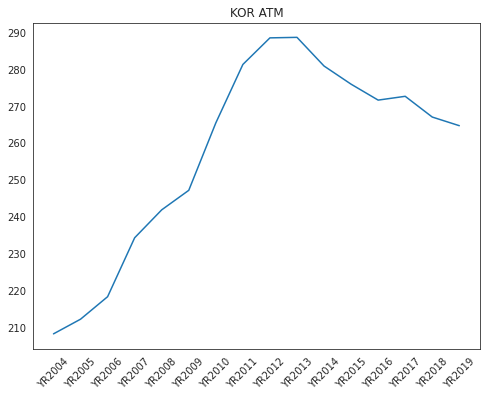

In [36]:
plt.figure(figsize = (8,6))

atm_k_df = pd.DataFrame(atm_k)

sns.lineplot(data=atm_k_df, legend=False)
plt.title('KOR ATM')
plt.xticks(rotation=45)

<Figure size 1080x576 with 0 Axes>

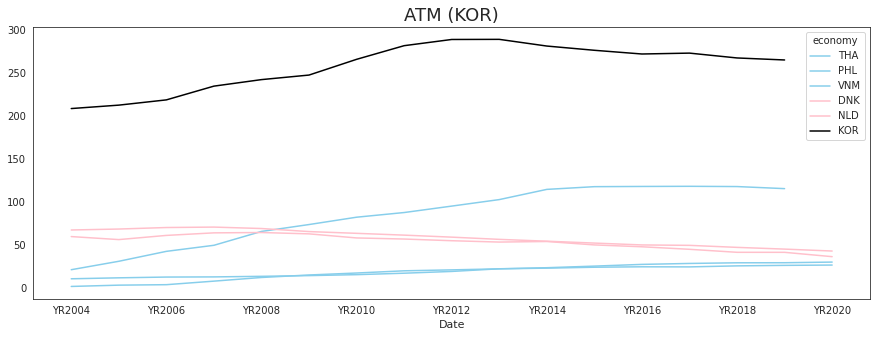

In [37]:
# Line graph by seaborn
# 대체 변수 3. Automated teller machines (ATMs) (per 100,000 adults)

a=atm_low.sort_values(by='YR2018', ascending=False)[:6]
b=atm_high.sort_values(by='YR2018', ascending=False)[:6]
c=atm_k
plt.figure(figsize = (15,8))
#ax=all_bank.transpose().plot(color='white', legend=False)
ax = a.T.plot(color='skyblue')
b.T.plot(ax=ax, color='pink', figsize=(15,5))
c.T.plot(ax=ax, color='black', figsize=(15,5), legend=True)
plt.title('ATM (KOR)', fontsize=18)
plt.xlabel('Date', fontsize=11)

plt.show()

In [38]:
# GDP
# gdp=wb.data.DataFrame('NY.GDP.PCAP.CD',  wb.region.members('WLD'))
gdp_all = gdp.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK','KOR']]
gdp_all = gdp_all.dropna(how='all',axis=True)

gdp_nocash=gdp_all.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
gdp_k=gdp_all.loc['KOR']
us_gdp=gdp_all.loc[['SWE','GBR','NLD','USA','NOR','DNK']]

In [39]:
gdp_compare = gdp_all.loc[['THA', 'VNM', 'PHL', 'NLD', 'DNK', 'KOR'], :]
gdp_low = gdp_all.loc[['THA', 'VNM', 'PHL'], :]
gdp_high = gdp_all.loc[['NLD', 'DNK'], :]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60],
 <a list of 61 Text major ticklabel objects>)

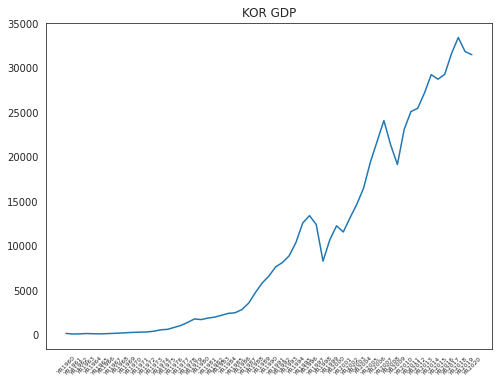

In [40]:
plt.figure(figsize = (8,6))

gdp_k_df = pd.DataFrame(gdp_k)

sns.lineplot(data=gdp_k_df, legend=False)
plt.title('KOR GDP')
plt.xticks(rotation=45, fontsize=6)

<Figure size 1080x576 with 0 Axes>

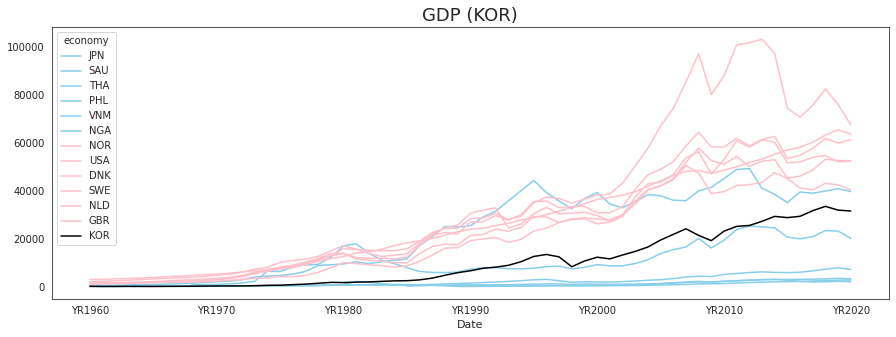

In [41]:
# Line graph by seaborn
# GDP

a=gdp_nocash.sort_values(by='YR2018', ascending=False)[:6]
b=us_gdp.sort_values(by='YR2018', ascending=False)[:6]
c=gdp_k
plt.figure(figsize = (15,8))
#ax=all_bank.transpose().plot(color='white', legend=False)
ax = a.T.plot(color='skyblue')
b.T.plot(ax=ax, color='pink', figsize=(15,5))
c.T.plot(ax=ax, color='black', figsize=(15,5), legend=True)
plt.title('GDP (KOR)', fontsize=18)
plt.xlabel('Date', fontsize=11)

plt.show()

2. 경제 외 지표 분석

In [42]:
# 대체 변수 1. Population ages 65 and above (% of total population)
# age = wb.data.DataFrame('SP.POP.65UP.TO.ZS',  wb.region.members('WLD'))
old_all = old.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK','KOR']]
old_all = old_all.dropna(how='all',axis=True)

old_nocash=old_all.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
old_k=old_all.loc['KOR']
us_old=old_all.loc[['SWE','GBR','NLD','USA','NOR','DNK']]

In [43]:
old_compare = old_all.loc[['THA', 'VNM', 'PHL', 'NLD', 'DNK', 'KOR'], :]
old_low = old_all.loc[['THA', 'VNM', 'PHL'], :]
old_high = old_all.loc[['NLD', 'DNK'], :]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60],
 <a list of 61 Text major ticklabel objects>)

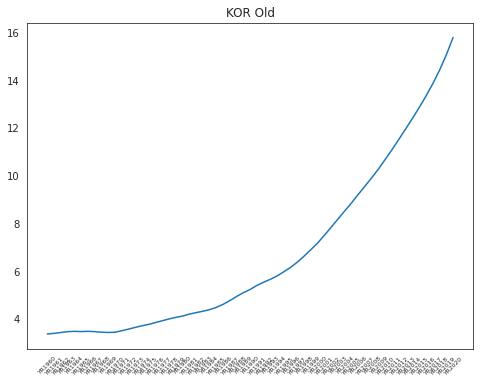

In [44]:
plt.figure(figsize = (8,6))

old_k_df = pd.DataFrame(old_k)

sns.lineplot(data=old_k_df, legend=False)
plt.title('KOR Old')
plt.xticks(rotation=45, fontsize=6)

<Figure size 1080x576 with 0 Axes>

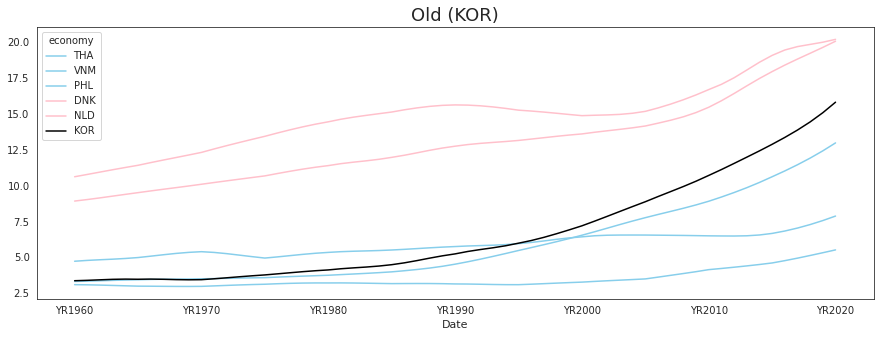

In [45]:
# Line graph by seaborn
# 대체 변수 1. Population ages 65 and above (% of total population)

a=old_low.sort_values(by='YR2018', ascending=False)[:6]
b=old_high.sort_values(by='YR2018', ascending=False)[:6]
c=old_k
plt.figure(figsize = (15,8))
#ax=all_bank.transpose().plot(color='white', legend=False)
ax = a.T.plot(color='skyblue')
b.T.plot(ax=ax, color='pink', figsize=(15,5))
c.T.plot(ax=ax, color='black', figsize=(15,5), legend=True)
plt.title('Old (KOR)', fontsize=18)
plt.xlabel('Date', fontsize=11)

plt.show()

In [46]:
# 대체 변수 2. Individuals using the Internet (% of population)
# it = wb.data.DataFrame('IT.NET.USER.ZS',  wb.region.members('WLD'))
it_all = it.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK','KOR']]
it_all = it_all.dropna(how='all',axis=True)

it_nocash=it_all.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
it_k=it_all.loc['KOR']
us_it=it_all.loc[['SWE','GBR','NLD','USA','NOR','DNK']]

In [47]:
it_compare = it_all.loc[['THA', 'VNM', 'PHL', 'NLD', 'DNK', 'KOR'], :]
it_low = it_all.loc[['THA', 'VNM', 'PHL'], :]
it_high = it_all.loc[['NLD', 'DNK'], :]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 <a list of 49 Text major ticklabel objects>)

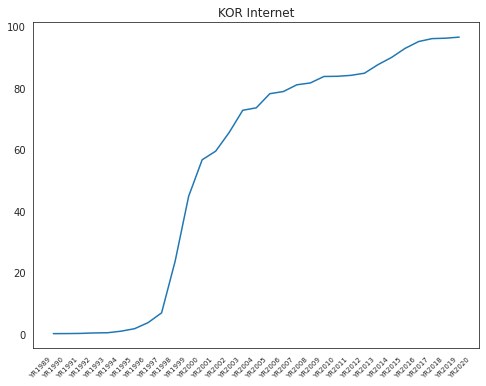

In [48]:
plt.figure(figsize = (8,6))

it_k_df = pd.DataFrame(it_k)

sns.lineplot(data=it_k_df, legend=False)
plt.title('KOR Internet')
plt.xticks(rotation=45, fontsize=7)

<Figure size 1080x576 with 0 Axes>

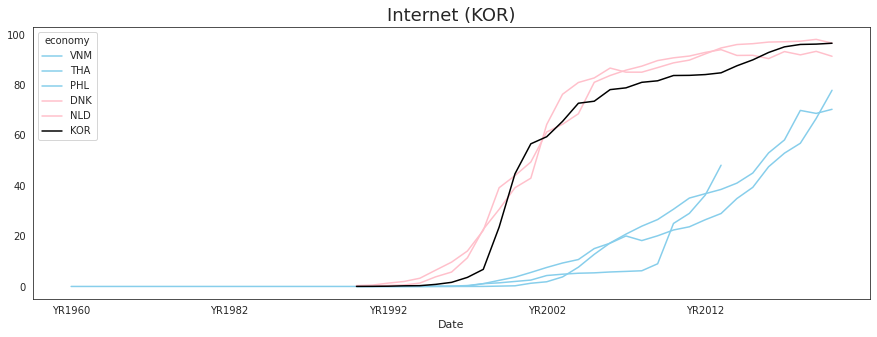

In [49]:
# Line graph by seaborn
# 대체 변수 2. Individuals using the Internet (% of population)

a=it_low.sort_values(by='YR2018', ascending=False)[:6]
b=it_high.sort_values(by='YR2018', ascending=False)[:6]
c=it_k
plt.figure(figsize = (15,8))
#ax=all_bank.transpose().plot(color='white', legend=False)
ax = a.T.plot(color='skyblue')
b.T.plot(ax=ax, color='pink', figsize=(15,5))
c.T.plot(ax=ax, color='black', figsize=(15,5), legend=True)
plt.title('Internet (KOR)', fontsize=18)
plt.xlabel('Date', fontsize=11)

plt.show()



---



In [50]:
# 그룹 1은 증가 추세, 그룹 2는 감소 추세 => 그렇다면 한국은? 감소추세 => 그룹 2와 비슷
bank_k = pd.DataFrame(bank_k)
bank_k.style.bar(color='lightblue')

,KOR
YR2004,16.800000
YR2005,17.330000
YR2006,17.820000
YR2007,18.310000
YR2008,18.700000
YR2009,18.190000
YR2010,18.180000
YR2011,18.220000
YR2012,18.310000
YR2013,18.020000


In [51]:
# 그룹 1은 증가 추세, 그룹 2는 감소 추세 => 그렇다면 한국은? 감소추세 => 그룹 2와 비슷
atm_k = pd.DataFrame(atm_k)
atm_k.style.bar(color='orange')

,KOR
YR2004,208.158010
YR2005,212.135754
YR2006,218.236550
YR2007,234.219409
YR2008,241.795990
YR2009,247.090642
YR2010,265.375150
YR2011,281.231400
YR2012,288.445032
YR2013,288.585453


In [52]:
ant_k = pd.DataFrame(ant_k)
gdp_k = pd.DataFrame(gdp_k)
old_k = pd.DataFrame(old_k)
it_k = pd.DataFrame(it_k)

d = pd.concat([ant_k, gdp_k, atm_k, bank_k, old_k, it_k], axis=1)

d = d.sort_index()
d.reset_index(level=0, inplace=True)
d.columns = ['year', 'ant', 'gdp', 'atm', 'bank', 'old', 'it']

d

,year,ant,gdp,atm,bank,old,it
0,YR1960,NaN,158.249303,NaN,NaN,3.366464,NaN
1,YR1961,NaN,93.828649,NaN,NaN,3.393214,NaN
2,YR1962,NaN,106.148506,NaN,NaN,3.429453,NaN
3,YR1963,NaN,146.314342,NaN,NaN,3.463467,NaN
4,YR1964,NaN,123.603495,NaN,NaN,3.478335,NaN
...,...,...,...,...,...,...,...
56,YR2016,NaN,29288.870439,271.561831,16.24,13.337940,92.843026
57,YR2017,94.851013,31616.843400,272.592801,15.44,13.852248,95.069422
58,YR2018,NaN,33422.944210,266.967032,15.27,14.418556,96.022860
59,YR2019,NaN,31846.218232,264.621500,15.10,15.060177,96.157579


In [53]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    61 non-null     object 
 1   ant     3 non-null      float64
 2   gdp     61 non-null     float64
 3   atm     16 non-null     float64
 4   bank    17 non-null     float64
 5   old     61 non-null     float64
 6   it      31 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.5+ KB
